## Loading of XY Table Data for Generating Plots

In [64]:
#Specify base-dir, be sure you use raw string so it doesn't translate \

#basedir = r'datasets\'
basedir = ''

In [61]:
#We cheat during array loading, need size of original dataset.

xstart = 47600 #Inclusive, um
xend = 50400 #Inclusive, um
ystart = 8600 #Inclusive, um
yend = 11800 #Inclusive, um
step = 200 #um

## Working with Dataset

The dataset is named `glitchloop_7_37mhz_location_XXX_YYY_500mV_10V_unit4.npy`, where `XXX` and `YYY` were the location
saved during the run.

Note the figures become 0-referenced on origin when creating figures, but are saved as "raw" XY location.

You can load the file with `np.load`, and will need to use the `.item()` to get back a ChipWhisperer `GlitchResults` object you can futher interact with. You can see `help()` for details of the `GlitchResults` object.

You can get the raw output with the `gr.result_dict` object.

In [63]:
import numpy as np
x = 47600
y = 9200
data = np.load(basedir + 'glitchloop_7_37mhz_location_%d_%d_500mV_10V_unit4.npy'%(x, y), allow_pickle=True)
gr = data.item()

print(gr.result_dict)

help(gr)

Help on GlitchResults in module chipwhisperer.common.results.glitch object:

class GlitchResults(builtins.object)
 |  GlitchResults(groups, parameters)
 |  
 |  GlitchResults tracks and plots fault injection attempts.
 |  
 |  When creating a new object, you must specify the groups of potential glitch
 |  results (such as 'success' or 'reset'), along with what parameters will be
 |  varied during this experimentation. For example a typical clock glitching
 |  setup might look like::
 |  
 |      gr = GlitchResults(groups=["success", "reset", "normal"], 
 |                         parameters=["width", "offset"])
 |      
 |  The order the groups ("success", etc) takes is used as a priority when later
 |  plotting results. The first group (in this case "success" in that list) that
 |  shows *any* results will become the reported effect of that fault. This is
 |  done as typically you'd prefer to spot say a 5% success rate than a 95% reset
 |  or normal rate. Once the object is initialize

## Plotting Location vs Results

In [201]:
import numpy as np

successxy = []

for x in range(xstart, xend+1,  step):
    for y in range(ystart, yend+1, step):

        try:
            data = np.load(basedir + 'glitchloop_7_37mhz_location_%d_%d_500mV_10V_unit4.npy'%(x, y), allow_pickle=True)
        except FileNotFoundError:
            print("Skipping %d-%d..."%(x,y))
            continue

        print("%d,%d: "%(x,y), end="")
            
        gr = data.item()

        data = gr.calc()

        success_total = 0
        reset_total = 0
        normal_total = 0
        flasherr_total = 0

        for d in data:
            success_total += d['success']
            reset_total += d['reset']
            normal_total += d['normal']
            flasherr_total += d['flasherr']
            
        successxy.append( (x, y, success_total, reset_total, normal_total, flasherr_total) )

        print(success_total)
        
        

47600,8600: 0
47600,8800: 12
47600,9000: 0
47600,9200: 17
47600,9400: 0
47600,9600: 10
47600,9800: 0
47600,10000: 0
47600,10200: 0
47600,10400: 0
47600,10600: 0
47600,10800: 1
47600,11000: 0
47600,11200: 0
47600,11400: 0
47600,11600: 0
47600,11800: 0
47800,8600: 0
47800,8800: 0
47800,9000: 0
47800,9200: 0
47800,9400: 0
47800,9600: 0
47800,9800: 0
47800,10000: 0
47800,10200: 12
47800,10400: 0
47800,10600: 0
47800,10800: 0
47800,11000: 0
47800,11200: 0
47800,11400: 0
47800,11600: 0
47800,11800: 0
48000,8600: 0
48000,8800: 0
48000,9000: 0
48000,9200: 0
48000,9400: 0
48000,9600: 0
48000,9800: 0
48000,10000: 0
48000,10200: 1
48000,10400: 0
48000,10600: 0
48000,10800: 0
48000,11000: 4
48000,11200: 0
48000,11400: 0
48000,11600: 0
48000,11800: 0
48200,8600: 0
48200,8800: 22
48200,9000: 0
48200,9200: 0
48200,9400: 0
48200,9600: 2
48200,9800: 207
48200,10000: 6
48200,10200: 0
48200,10400: 2
48200,10600: 0
48200,10800: 0
48200,11000: 0
48200,11200: 7
48200,11400: 0
48200,11600: 0
48200,11800: 0
4

In [202]:
successxy

[(47600, 8600, 0, 0, 4180, 0),
 (47600, 8800, 12, 11, 4157, 0),
 (47600, 9000, 0, 49, 4131, 0),
 (47600, 9200, 17, 12, 4151, 0),
 (47600, 9400, 0, 0, 4180, 0),
 (47600, 9600, 10, 0, 4170, 0),
 (47600, 9800, 0, 0, 4180, 0),
 (47600, 10000, 0, 0, 4180, 0),
 (47600, 10200, 0, 0, 4180, 0),
 (47600, 10400, 0, 1, 4179, 0),
 (47600, 10600, 0, 0, 4180, 0),
 (47600, 10800, 1, 3, 4176, 0),
 (47600, 11000, 0, 0, 4180, 0),
 (47600, 11200, 0, 0, 4180, 0),
 (47600, 11400, 0, 0, 4180, 0),
 (47600, 11600, 0, 0, 4180, 0),
 (47600, 11800, 0, 0, 4180, 0),
 (47800, 8600, 0, 0, 4180, 0),
 (47800, 8800, 0, 0, 4180, 0),
 (47800, 9000, 0, 0, 4180, 0),
 (47800, 9200, 0, 0, 4180, 0),
 (47800, 9400, 0, 0, 4180, 0),
 (47800, 9600, 0, 0, 4180, 0),
 (47800, 9800, 0, 0, 4180, 0),
 (47800, 10000, 0, 2, 4178, 0),
 (47800, 10200, 12, 3, 4165, 0),
 (47800, 10400, 0, 0, 4180, 0),
 (47800, 10600, 0, 1, 4179, 0),
 (47800, 10800, 0, 2, 4178, 0),
 (47800, 11000, 0, 0, 4180, 0),
 (47800, 11200, 0, 0, 4180, 0),
 (47800, 11400,

In [203]:
successes = [i[2] for i in successxy]
resets = [i[3] for i in successxy]
normals = [i[4] for i in successxy]
flasherrss = [i[5] for i in successxy]

print(len(successes))

xsteps = round((xend - xstart) / step) + 1
ysteps = round((yend - ystart) / step) + 1

print(xsteps)
print(ysteps)

if (ysteps * xsteps == len(successes)):
    print("Shapes are consistent.")
else:
    raise ValueError("Check sizes.")

successes = np.reshape(successes, (xsteps, ysteps)).T
resets = np.reshape(resets, (xsteps, ysteps)).T
normals = np.reshape(normals, (xsteps, ysteps)).T
flasherrss = np.reshape(flasherrss, (xsteps, ysteps)).T

print("Successes:")
print(successes)

print("Resets:")
print(resets)

print("Normal Responses:")
print(normals)

print("Flash Errors:")
print(flasherrss)

255
15
17
Shapes are consistent.
Successes:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 12   0   0  22   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 17   0   0   0   0   7   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   0   0]
 [ 10   0   0   2   0   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0 207   2   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   6   0   0   0   0   0   0   0   0   0   0   0]
 [  0  12   1   0   6   0   0   0   0   0   2   0   0   0   0]
 [  0   0   0   2   0   0   0   6   2  19   1   1   1   0   0]
 [  0   0   0   0   0   0   0   1   0   6   9   0   0   0   0]
 [  1   0   0   0   3   0   0   0   0   0   0   0   0   0   0]
 [  0   0   4   0   0   0  13   0   1   0   0   0   0   0   0]
 [  0   0   0   7   8   5 148 186  40   2 172   2   6   0   0]
 [  0   0   0   0   0   0  56 171 335  65   7 115   2   4   2]
 [  0   0  

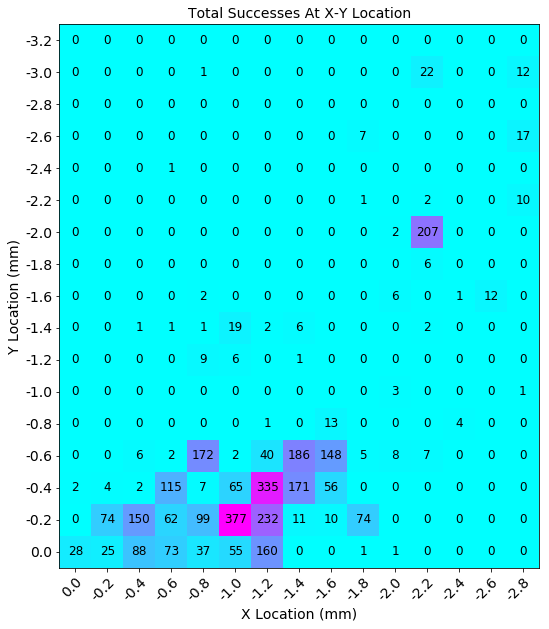

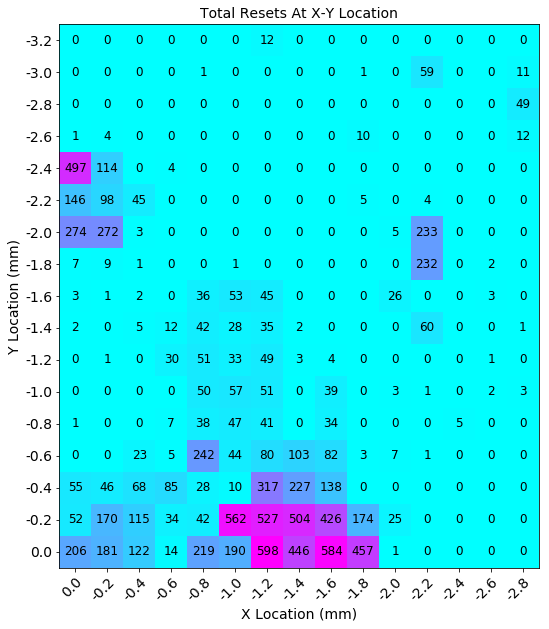

In [204]:
import matplotlib
import matplotlib.pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def makehmap(hmdata):
    x = ["%.1f"%((d-xend)/1000.0) for d in range(xstart, xend+1, step)]
    y = ["%.1f"%((d-yend)/1000.0) for d in range(ystart, yend+1, step)]

    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(hmdata, cmap='cool', interpolation='nearest')

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(x)))
    ax.set_yticks(np.arange(len(y)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(x)
    ax.set_yticklabels(y)
    ax.set_xlabel("X Location (mm)")
    ax.set_ylabel("Y Location (mm)")

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(y)):
        for j in range(len(x)):
            text = ax.text(j, i, hmdata[i, j],
                           ha="center", va="center", color="k")    
    ax.set_xlim(ax.get_xlim()[::-1]) # Flip x
    return ax
    
ax = makehmap(successes)
ax.set_title("Total Successes At X-Y Location")
plt.savefig("successesxy.png", dpi=300, bbox_inches = 'tight')
plt.show()
ax = makehmap(resets)
ax.set_title("Total Resets At X-Y Location")
plt.savefig("resetsxy.png", dpi=300, bbox_inches = 'tight')
plt.show()

## Plotting Minimum Voltage to Glitch vs. Location

In [205]:
import numpy as np

successxyvoltages = []

for x in range(xstart, xend+1,  step):
    for y in range(ystart, yend+1, step):

        try:
            data = np.load(basedir + 'glitchloop_7_37mhz_location_%d_%d_500mV_10V_unit4.npy'%(x, y), allow_pickle=True)
        except FileNotFoundError:
            print("Skipping %d-%d..."%(x,y))
            continue

        print("%d,%d: "%(x,y), end="")
            
        gr = data.item()
        
        voltages = [500] #We use 500 as "invalid" for the min logic to work, fixing it later
        
        for params in gr.result_dict['success']:
            v_success = params['parameters'][0]
            cycles_success = params['parameters'][1]
            
            voltages.append(v_success)
            
        minv = min(voltages)
        print(minv)
        
        successxyvoltages.append(minv)

47600,8600: 500
47600,8800: 7.75
47600,9000: 500
47600,9200: 8.0
47600,9400: 500
47600,9600: 8.0
47600,9800: 500
47600,10000: 500
47600,10200: 500
47600,10400: 500
47600,10600: 500
47600,10800: 6.75
47600,11000: 500
47600,11200: 500
47600,11400: 500
47600,11600: 500
47600,11800: 500
47800,8600: 500
47800,8800: 500
47800,9000: 500
47800,9200: 500
47800,9400: 500
47800,9600: 500
47800,9800: 500
47800,10000: 500
47800,10200: 8.25
47800,10400: 500
47800,10600: 500
47800,10800: 500
47800,11000: 500
47800,11200: 500
47800,11400: 500
47800,11600: 500
47800,11800: 500
48000,8600: 500
48000,8800: 500
48000,9000: 500
48000,9200: 500
48000,9400: 500
48000,9600: 500
48000,9800: 500
48000,10000: 500
48000,10200: 9.25
48000,10400: 500
48000,10600: 500
48000,10800: 500
48000,11000: 5.25
48000,11200: 500
48000,11400: 500
48000,11600: 500
48000,11800: 500
48200,8600: 500
48200,8800: 5.5
48200,9000: 500
48200,9200: 500
48200,9400: 500
48200,9600: 8.0
48200,9800: 3.5
48200,10000: 8.0
48200,10200: 500
482

In [206]:
NO_SUCCESSES = -0.005
successxyvoltages = [NO_SUCCESSES if d==500 else d for d in successxyvoltages]
successxyvoltages = np.reshape(successxyvoltages, (xsteps, ysteps)).T

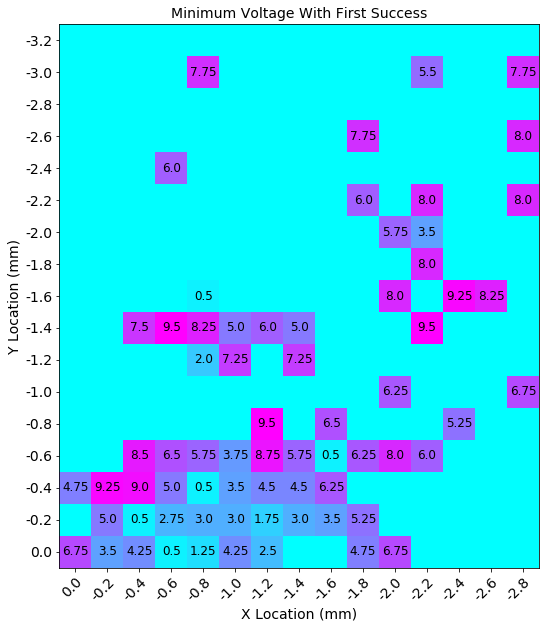

In [207]:
import matplotlib
import matplotlib.pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def makehmap2(hmdata):
    x = ["%.1f"%((d-xend)/1000.0) for d in range(xstart, xend+1, step)]
    y = ["%.1f"%((d-yend)/1000.0) for d in range(ystart, yend+1, step)]

    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(hmdata, cmap='cool', interpolation='nearest')

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(x)))
    ax.set_yticks(np.arange(len(y)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(x)
    ax.set_yticklabels(y)
    ax.set_xlabel("X Location (mm)")
    ax.set_ylabel("Y Location (mm)")

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(y)):
        for j in range(len(x)):
            txdata = hmdata[i, j]
            if txdata == NO_SUCCESSES:
                txdata = ""
            text = ax.text(j, i, txdata,
                           ha="center", va="center", color="k")    
    ax.set_xlim(ax.get_xlim()[::-1]) # Flip x
    return ax
    
ax = makehmap2(successxyvoltages)
ax.set_title("Minimum Voltage With First Success")
plt.savefig("successesxyv_single.png", dpi=300, bbox_inches = 'tight')
plt.show()

## Plotting Minimum Voltage to Glitch vs. Location

In [208]:
import numpy as np

successxyvoltages = []

for x in range(xstart, xend+1,  step):
    for y in range(ystart, yend+1, step):

        try:
            data = np.load(basedir + 'glitchloop_7_37mhz_location_%d_%d_500mV_10V_unit4.npy'%(x, y), allow_pickle=True)
        except FileNotFoundError:
            print("Skipping %d-%d..."%(x,y))
            continue

        print("%d,%d: "%(x,y), end="")
            
        gr = data.item()
        
        voltages = [500] #We use 500 as "invalid" for the min logic to work, fixing it later
        minv = 500
        
        for params in gr.result_dict['success']:
            v_success = params['parameters'][0]
            cycles_success = params['parameters'][1]
            
            voltages.append(v_success)
            
        if len(voltages) > 10:            
            minv = min(voltages)
            
        print(minv)
        
        successxyvoltages.append(minv)

47600,8600: 500
47600,8800: 7.75
47600,9000: 500
47600,9200: 8.0
47600,9400: 500
47600,9600: 8.0
47600,9800: 500
47600,10000: 500
47600,10200: 500
47600,10400: 500
47600,10600: 500
47600,10800: 500
47600,11000: 500
47600,11200: 500
47600,11400: 500
47600,11600: 500
47600,11800: 500
47800,8600: 500
47800,8800: 500
47800,9000: 500
47800,9200: 500
47800,9400: 500
47800,9600: 500
47800,9800: 500
47800,10000: 500
47800,10200: 8.25
47800,10400: 500
47800,10600: 500
47800,10800: 500
47800,11000: 500
47800,11200: 500
47800,11400: 500
47800,11600: 500
47800,11800: 500
48000,8600: 500
48000,8800: 500
48000,9000: 500
48000,9200: 500
48000,9400: 500
48000,9600: 500
48000,9800: 500
48000,10000: 500
48000,10200: 500
48000,10400: 500
48000,10600: 500
48000,10800: 500
48000,11000: 500
48000,11200: 500
48000,11400: 500
48000,11600: 500
48000,11800: 500
48200,8600: 500
48200,8800: 5.5
48200,9000: 500
48200,9200: 500
48200,9400: 500
48200,9600: 500
48200,9800: 3.5
48200,10000: 500
48200,10200: 500
48200,

In [209]:
NO_SUCCESSES = -0.005
successxyvoltages = [NO_SUCCESSES if d==500 else d for d in successxyvoltages]
successxyvoltages = np.reshape(successxyvoltages, (xsteps, ysteps)).T

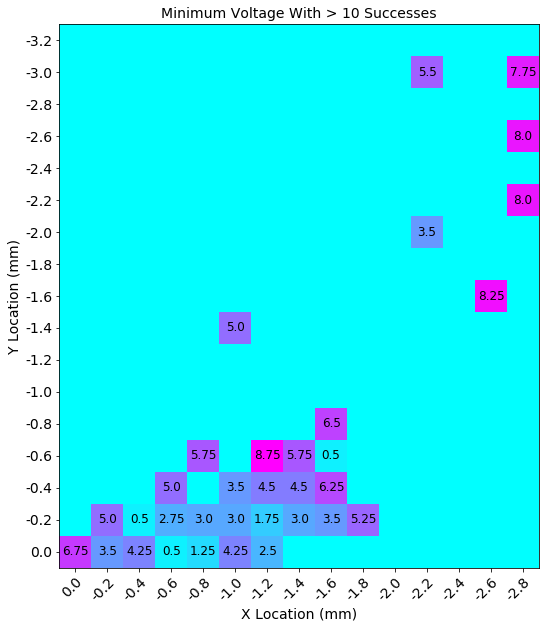

In [210]:
ax = makehmap2(successxyvoltages)
ax.set_title("Minimum Voltage With > 10 Successes")
plt.savefig("successesxyv_multi.png", dpi=300, bbox_inches = 'tight')
plt.show()

## Make Chip Figure Plot

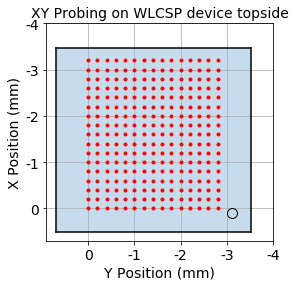

In [211]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

chipx = 4.223
chipy = 3.969

#From measurements of device
xoff = 51.1 - 50.4
yoff = 12.3 - 11.8

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
ax1.add_patch(patches.Rectangle( (-xoff,-yoff), chipx, chipy, alpha=0.25))
plt.plot([-xoff, chipx-xoff], [-yoff, -yoff], 'k')
plt.plot([-xoff, chipx-xoff], [chipy-yoff, chipy-yoff], 'k')
plt.plot([-xoff, -xoff], [-yoff, chipy-yoff], 'k')
plt.plot([chipx-xoff, chipx-xoff], [-yoff, chipy-yoff], 'k')

for x in range(0, 2900, 200): #Include 2.8mm endpoint
    x = x / 1000.0
    
    for y in range(0, 3300, 200): #Include 3.2mm endpoint
        y = y / 1000.0
        
        plt.plot(x, y, '.r')
        
plt.plot(3.8-xoff, 0.4-yoff, 'ok', fillstyle='none', markersize=10)
        
plt.title('XY Probing on WLCSP device topside')
plt.ylabel('X Position (mm)')
plt.xlabel('Y Position (mm)')

plt.xticks([0, 1, 2, 3, 4], ['0', '-1', '-2', '-3', '-4'])
plt.yticks([0, 1, 2, 3, 4], ['0', '-1', '-2', '-3', '-4'])

plt.grid()

plt.savefig("probeposition.png", dpi=300)